# **Credit Card Dataset for Clustering**

---


# About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

# Import required libraries

In [ ]:
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
from numpy.linalg import norm
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
sns.set()
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage

load data

In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv')

## investigate data

In [ ]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#check the null values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

`NOTE ==> Here we can see that there was missing data in "CREDIT_LIMIT" and in "MINIMUM_PAYMENTS"`



In [ ]:
# Check for duplicates
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3a14a37d0>,
      dtype=object)

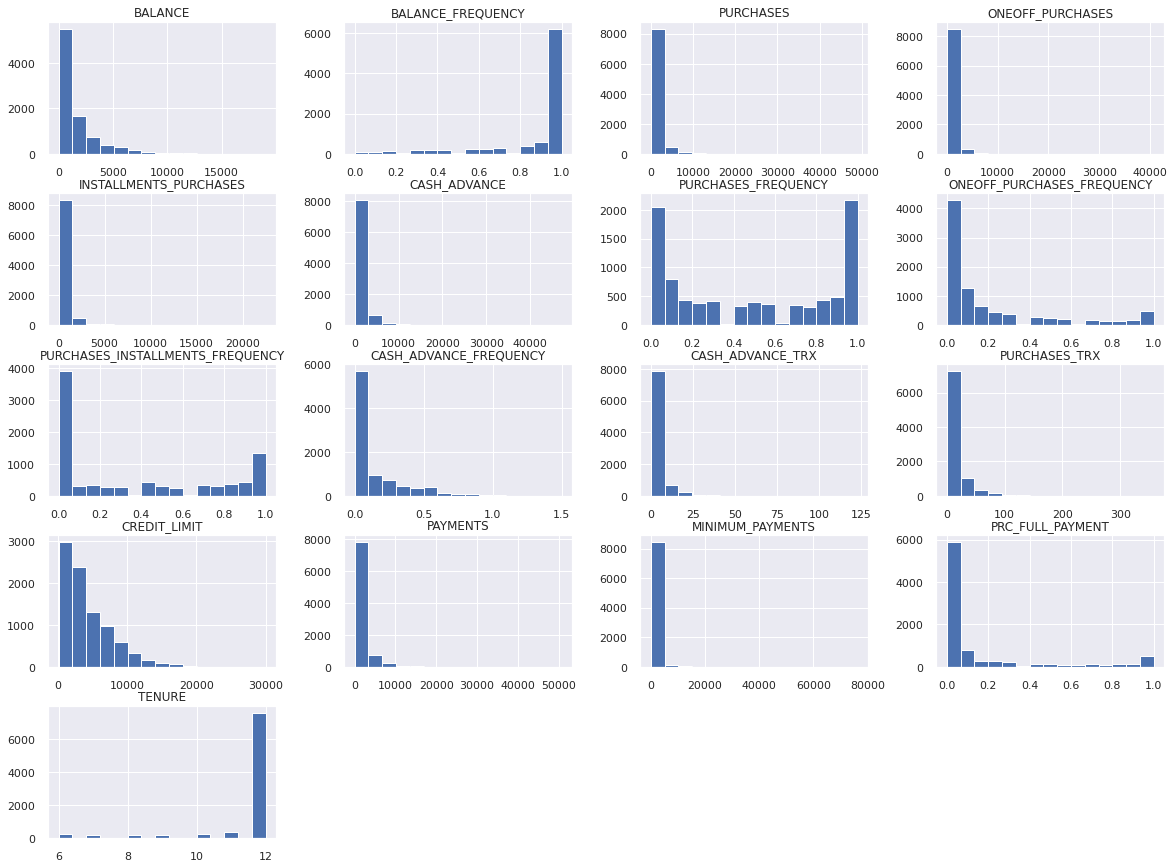

In [ ]:
# data Distributions
#Use a histogram to visualize the distribution of each feature.
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()   #convert dataframe columns to list
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4))


In [ ]:
# Measures of Skewness 
df.agg(['skew']).transpose()
# Fairly Symmetrical	-0.5 to 0.5
# Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
# Highly Skewed	< -1.0 and > 1.0

,skew
BALANCE,2.393386
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
ONEOFF_PURCHASES,10.045083
INSTALLMENTS_PURCHASES,7.299120
CASH_ADVANCE,5.166609
PURCHASES_FREQUENCY,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201
CASH_ADVANCE_FREQUENCY,1.828686


**Skewness**

`is simply how much data set is deviating from its normal distribution. A larger negative value in the data set means that distribution is negatively skewed & larger positive value in the data set means that distribution is positively distributed. It is a good statistical measure that helps the investor to predict returns from the distribution.`

https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/#:~:text=One%20way%20of%20handling%20right%2C%20or%20left%2C%20skewed,well%20as%20the%20Box-Cox%20and%20Square%20root%20transformations.

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Visualize quartiles and outliers with box plots

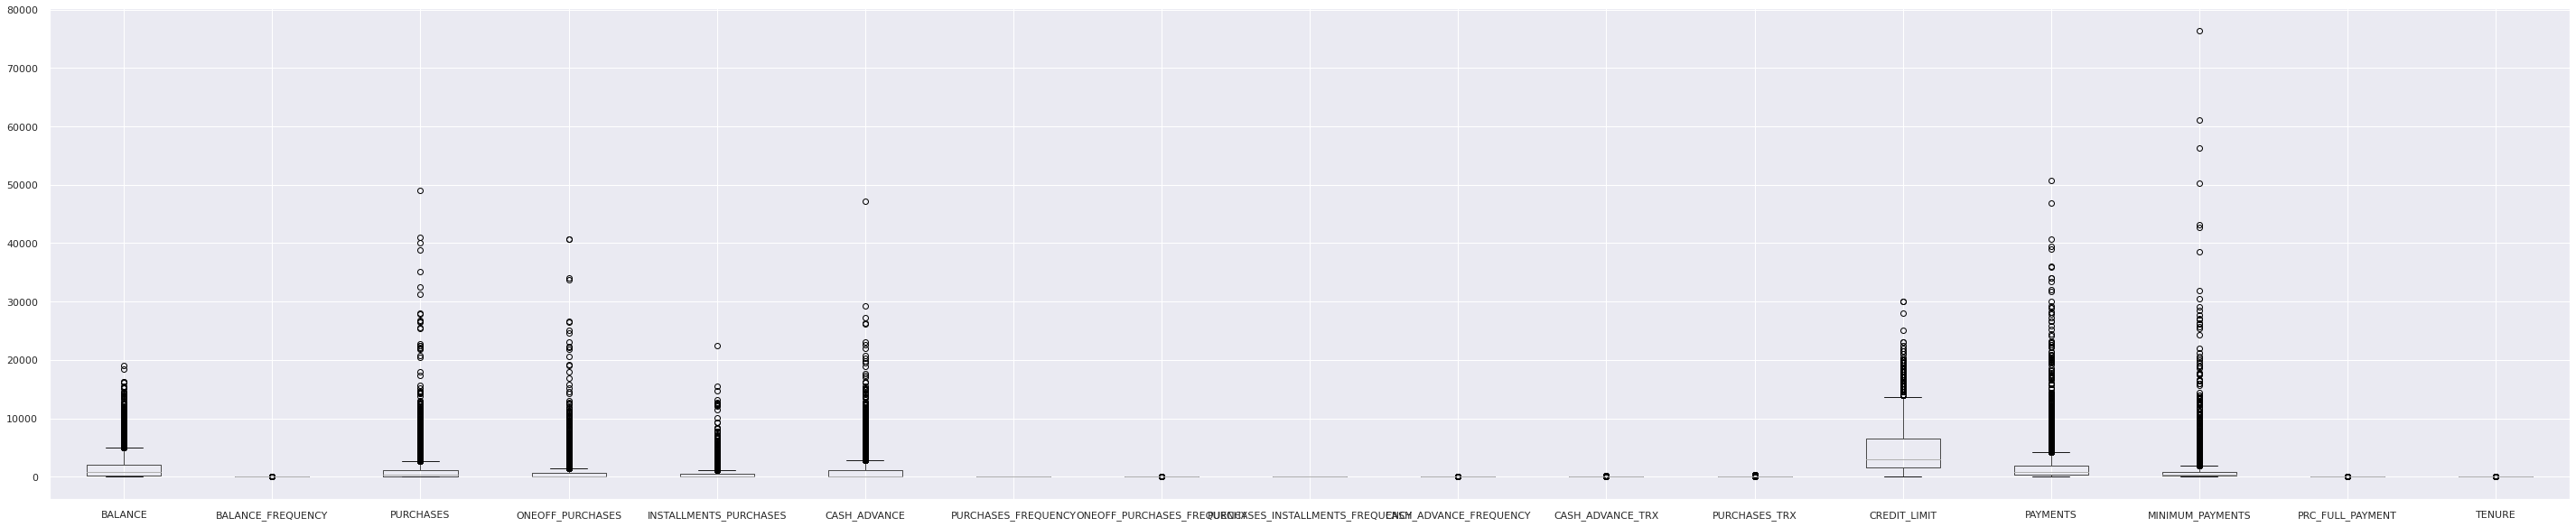

In [ ]:
# Plot to see outlers
df.boxplot(figsize= [50,10])

plt.show()

In [ ]:
# another way to plot outliers
# fig = plt.figure(figsize=(20, 10))
# for idx, col in enumerate(df.columns, 1):
#     ax = fig.add_subplot(6, 3, idx)
#     sns.boxplot(x=df[col], ax=ax)
# plt.tight_layout()

view corrolation heatmap

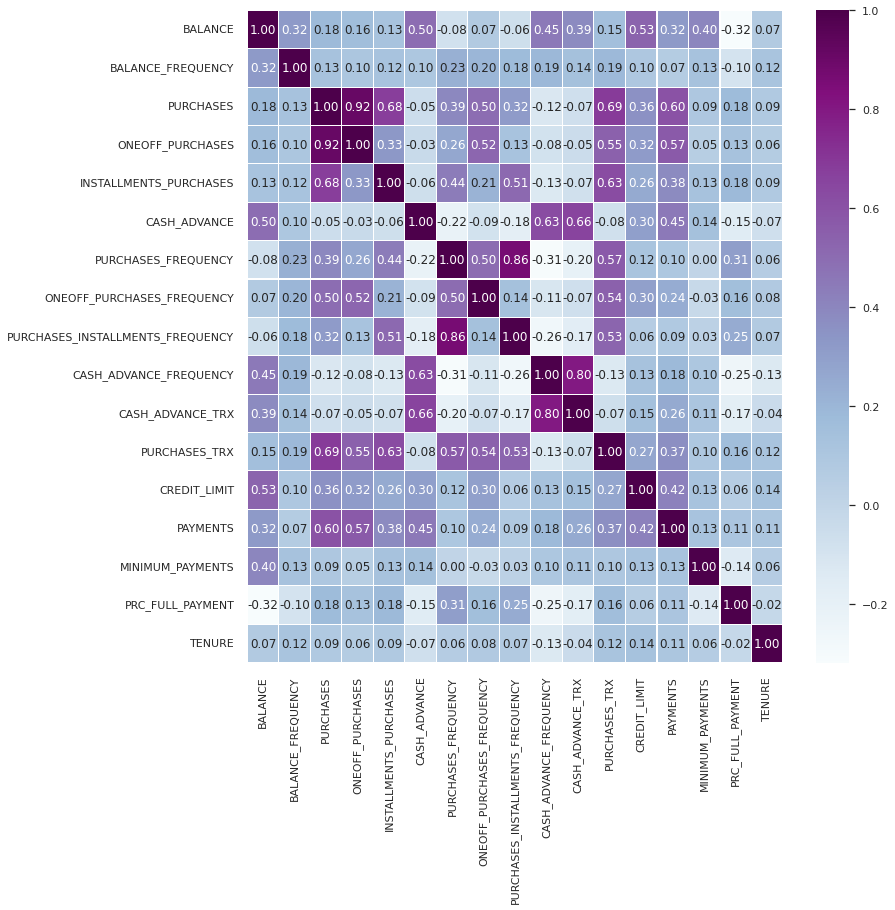

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,  cmap= 'BuPu',fmt='.2f');

# Data Preparation

Replace nulls with mean  

In [ ]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [ ]:
#drop non used columns
df.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

In [ ]:
df_copy=df

In [ ]:
# Transformation of data 
df_logged = np.log1p(df_copy)
df_logged.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094870,6.624540,5.951599,0.117730,2.519680
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819635,1.591763,1.179645,0.211617,0.130367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.762968,0.133531,2.564949
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949


In [ ]:
df_copy.agg(['skew']).transpose()  # Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0

,skew
BALANCE,2.393386
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
ONEOFF_PURCHASES,10.045083
INSTALLMENTS_PURCHASES,7.299120
CASH_ADVANCE,5.166609
PURCHASES_FREQUENCY,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201
CASH_ADVANCE_FREQUENCY,1.828686


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb39e994590>,
      dtype=object)

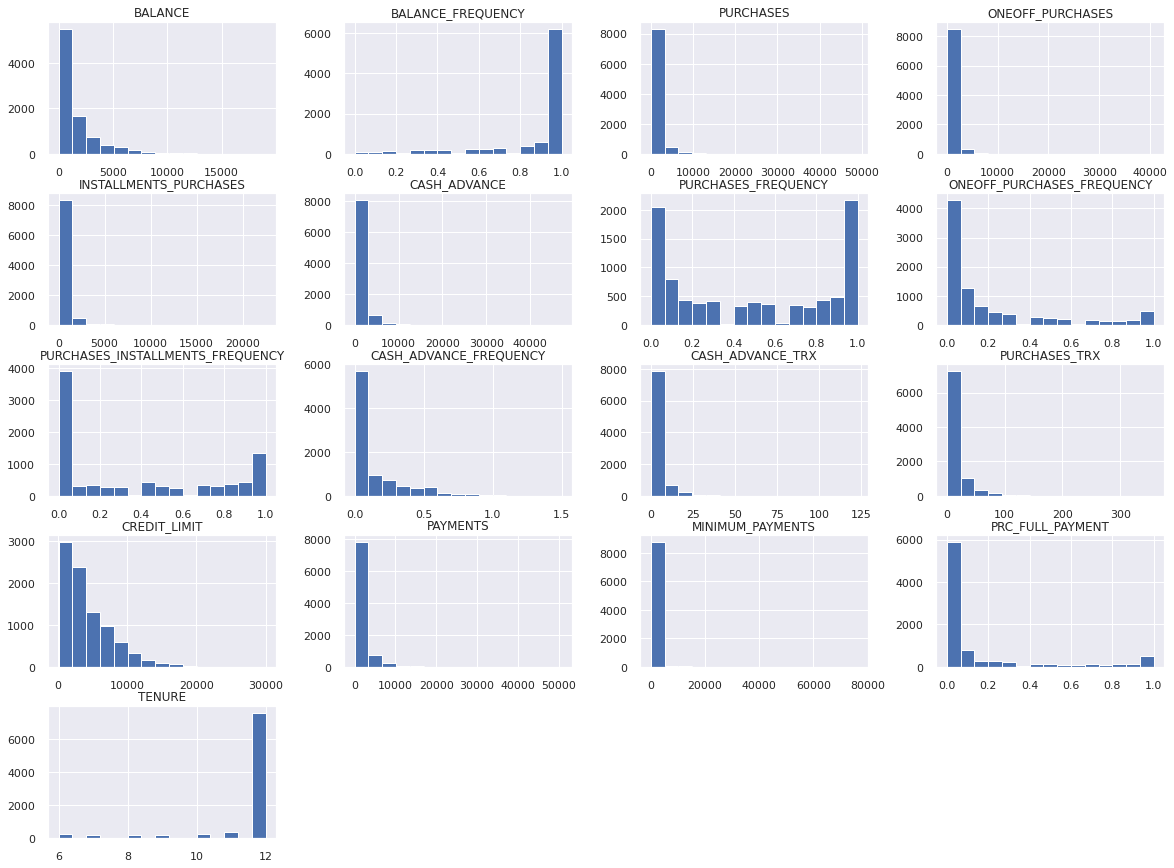

In [ ]:
# data Distributions
df_copy[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4))


In [ ]:
scale_transform = StandardScaler()
df_scaled = scale_transform.fit_transform(df_logged)

In [ ]:
# f = pd.melt(df, value_vars=df.columns)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

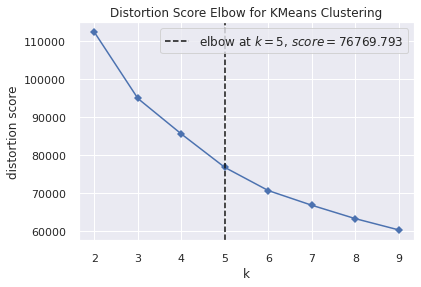

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
clusterNum =5
k_means_pca = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=42)
k_means_pca.fit(df_scaled)
labels = k_means_pca.labels_
print("labels = ",labels)
print("silhouette score for data = ",silhouette_score(df_scaled, labels))

labels =  [2 0 3 ... 1 2 2]
silhouette score for data =  0.2270790481963853


# PCA

In [ ]:
pca_df=df_scaled

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
components  = pca.fit_transform(pca_df)

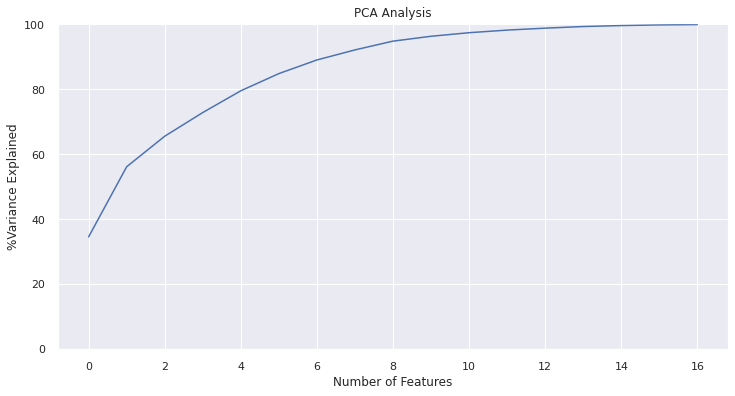

In [ ]:
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('%Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)

plt.plot(var)

`Generally, we want the explained variance to be >90%. I decided to with 90% which is about 10 components`

In [ ]:
pca = PCA(n_components=10)
pca_scale = pca.fit_transform(pca_df)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
pca_df_scale.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.260016,-2.678496,-0.286500,-1.041042,0.222295,-0.357280,-0.717452,-0.315465,0.281905,-0.317502
1,-3.483375,0.991869,-0.036970,0.036928,-1.757557,-0.281989,0.774766,0.037614,-0.406104,0.414869
2,1.469742,1.278558,2.720253,-0.986920,0.669906,-0.199234,0.485008,0.647608,0.311467,1.070714
3,-1.373669,-0.761627,1.757777,-1.103613,1.791796,2.287470,0.413824,2.537843,0.201218,-1.659940
4,-1.151204,-1.368904,0.953653,-1.579382,0.126384,-1.394665,-0.250660,-0.429264,0.042078,-0.142061


In [ ]:
print(pca.explained_variance_ratio_)

[0.34474454 0.21599269 0.09441221 0.07311003 0.06684438 0.05270834
 0.04208042 0.03056715 0.02706345 0.01543954]


`We can see that component 1 and 2 clearly expalin more variance than the others`

Finding the optimal number of clusters using the elbow method

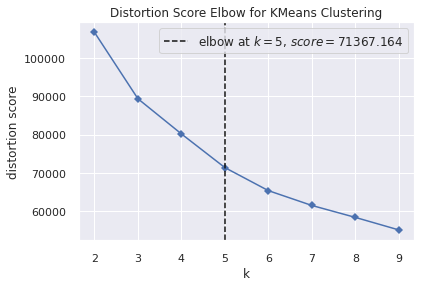

In [ ]:
pca_model = KMeans()
visualizer = KElbowVisualizer(pca_model, k=(2,10), timings=False)
visualizer.fit(pca_df_scale)
visualizer.show()

we can see that the optimal value for k=5

In [ ]:
clusterNum =5
k_means_pca = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=42)
k_means_pca.fit(pca_df_scale)
labels = k_means_pca.labels_
print("labels = ",labels)
print("silhouette score for pca = ",silhouette_score(pca_df_scale, labels))

labels =  [4 1 2 ... 0 4 4]
silhouette score for pca =  0.23766799454379256


https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=Silhouette%20score%20is%20used%20to%20evaluate%20the%20quality,is%20calculated%20for%20each%20sample%20of%20different%20clusters.

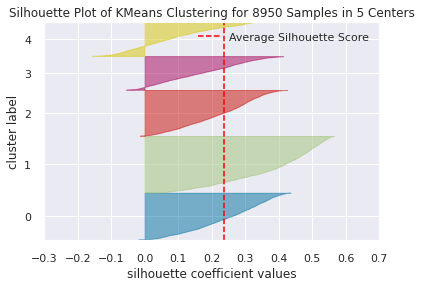

In [ ]:
visualizer = SilhouetteVisualizer(k_means_pca, colors='yellowbrick')
visualizer.fit(pca_df_scale,axis=1)
visualizer.show()

`silhouette score for each cluster is above the average silhouette score therefore we are good.`

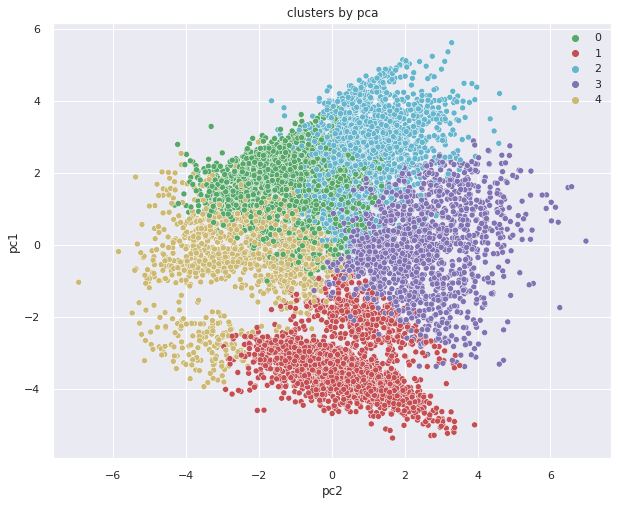

In [ ]:
x_axis = pca_df_scale['pc2']
y_axis = pca_df_scale['pc1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = labels, palette = ['g','r','c','m','y'])
plt.title('clusters by pca')
plt.show()

https://plotly.com/python/pca-visualization/

**Kernel PCA**

In [ ]:
kpcadf=df_scaled
kpca = KernelPCA(n_components=10)
kpca.fit(kpcadf)
KPCA_df = pd.DataFrame(kpca.transform(kpcadf), columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [ ]:
clusterNum =5
k_means_kpca = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=42)
k_means_kpca.fit(KPCA_df)
labels = k_means_pca.labels_
KPCA_df_ = pd.DataFrame(k_means_kpca.transform(KPCA_df), columns=['pc1','pc2','pc3','pc4','pc5'])
print("labels = ",labels)
print("silhouette score for kpca = ",silhouette_score(KPCA_df, labels))

labels =  [4 1 2 ... 0 4 4]
silhouette score for kpca =  0.2376679945437925


In [ ]:
KPCA_df_.head()

,pc1,pc2,pc3,pc4,pc5
0,2.946542,4.439491,4.946412,5.537218,2.245379
1,6.081707,1.905418,6.440768,4.704066,5.357042
2,5.106322,5.881334,2.585750,4.494017,4.895301
3,6.243818,5.432721,6.251803,5.899498,4.519560
4,4.110004,3.465086,4.773014,5.201204,2.999655


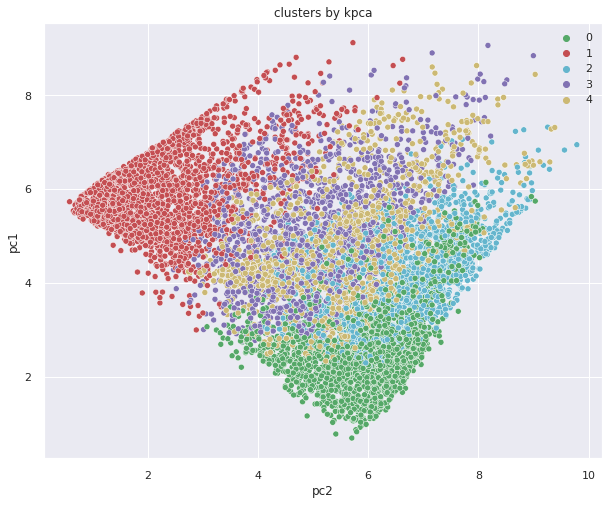

In [ ]:
x_axis = KPCA_df_['pc2']
y_axis = KPCA_df_['pc1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = labels, palette = ['g','r','c','m','y'])
plt.title('clusters by kpca')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


# TSNE

In [63]:
tsne_kpca = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10000, 
                       random_state=42)
tsne_results_kpca = tsne_kpca.fit_transform(KPCA_df)
tsne_df_kpca = pd.DataFrame(tsne_results_kpca)

In [83]:
tsne_df_kpca.columns

Index([0, 1, 'label_em'], dtype='object')

# AgglomerativeClustering

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=5,linkage='complete')
agglomerative.fit(df_scaled)
df_label = agglomerative.labels_
print("silhouette score for original data ",silhouette_score(df_scaled,df_label))

agglomerative = AgglomerativeClustering(n_clusters=5,linkage='complete')
agglomerative.fit(pca_df)
pca_label = agglomerative.labels_
print("silhouette score for pca data ",silhouette_score(pca_df,pca_label))

agglomerative = AgglomerativeClustering(n_clusters=5,linkage='complete')
agglomerative.fit(KPCA_df)
KPCA_label = agglomerative.labels_
print("silhouette score for kpca data ",silhouette_score(KPCA_df, KPCA_label))

silhouette score for original data  0.17968372375725744
silhouette score for pca data  0.17968372375725744
silhouette score for kpca data  0.1272987527896994


In [ ]:
print("silhouette score for original data in  hierarchical clustering ",silhouette_score(df_scaled, df_label))
print("silhouette score for pca data in  hierarchical clustering ",silhouette_score(pca_df, pca_label))
print("silhouette score for kpca data in  hierarchical clustering ",silhouette_score(KPCA_df, KPCA_label))

silhouette score for original data in  hierarchical clustering  0.17968372375725744
silhouette score for pca data in  hierarchical clustering  0.17968372375725744
silhouette score for kpca data in  hierarchical clustering  0.1272987527896994


https://plotly.com/python/t-sne-and-umap-projections/

# DBSCAN

In [68]:
kpcadf=df_logged
kpca = KernelPCA(n_components=10)
kpca.fit(kpcadf)
KPCA_df = pd.DataFrame(kpca.transform(kpcadf), columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

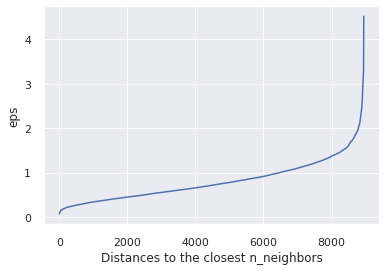

In [71]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(KPCA_df)
distances, neighbors =nbrs.kneighbors(KPCA_df)
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [72]:
dbs = DBSCAN(eps=0.05)
dbs.fit(KPCA_df)

DBSCAN(eps=0.05)

In [77]:
dbs.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [78]:
KPCA_df['DBSC Clusters'] = dbs.labels_
px.scatter(KPCA_df,  color="DBSC Clusters",x='pc1', y='pc2',title="T-SNE for Kernal PCA Data using DBSCAN")
 

# Expectation-Maximization(EM)

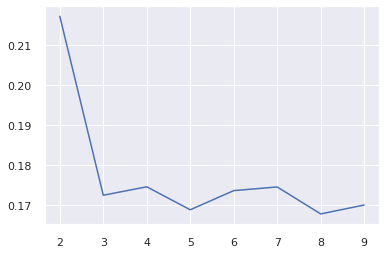

In [ ]:
from sklearn.mixture import GaussianMixture

range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    
    gmm = GaussianMixture(n_components=n_clusters)
    gmm_label = gmm.fit_predict(df_scaled)
    # compute silhouette score and append to list
    silhouette_avg = silhouette_score(df_scaled, gmm_label)
    silhoutte_score += [silhouette_avg]
    # check if silhouette score greater than any score in lisst , select cluster as best clustering 
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = gmm

plt.plot(range_n_cluster, silhoutte_score)

In [79]:
gmm = GaussianMixture(n_components=8)
gmm_label['label_KPCA'] = gmm.fit_predict(KPCA_df)

In [97]:
tsne_df_kpca[0]

0       14.855266
1      -68.949577
2        7.659653
3      -22.491343
4      -15.360923
          ...    
8945    41.082878
8946    34.897453
8947    38.486351
8948   -59.276814
8949   -30.240093
Name: 0, Length: 8950, dtype: float32

[Text(0.5, 1.0, 'kpca data')]

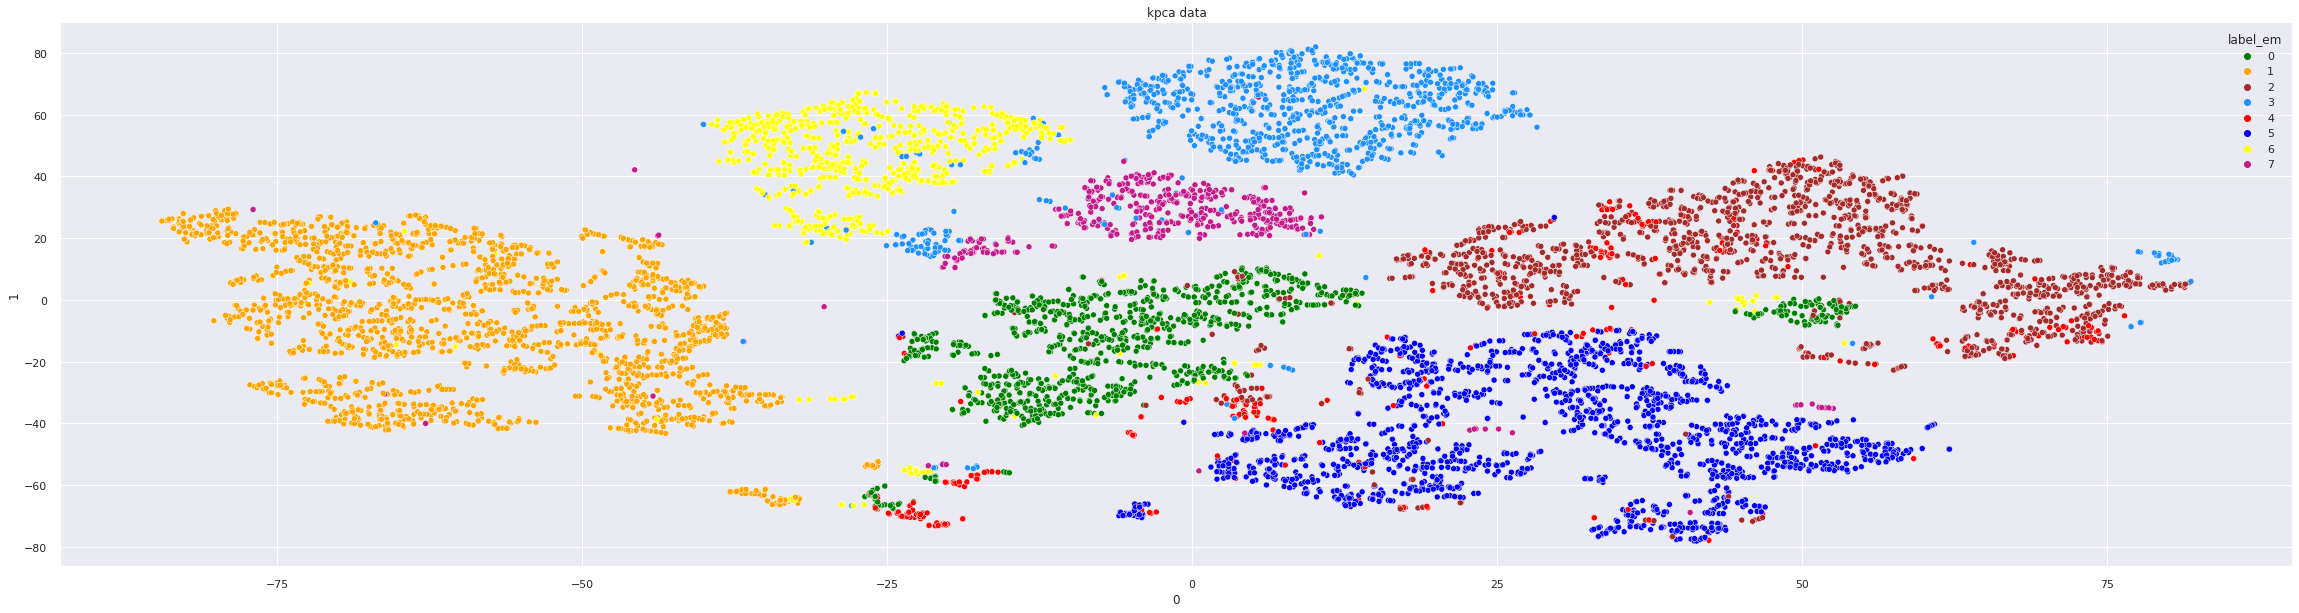

In [100]:
tsne_df_kpca['label_em']=gmm_label['label_KPCA']
fig, axs = plt.subplots(ncols=1,figsize=(40,10))
sns.scatterplot(
    x=tsne_df_kpca[0], y=tsne_df_kpca[1]
    ,hue=tsne_df_kpca['label_em'],palette=['green','orange','brown','dodgerblue',"red",'blue','yellow',"#c51b8a"]).set(title='kpca data')

